# Métodos e Modelos Avançados em Ciência de Dados

## Comportamento de AEs - Denoising Autoencoder (dAE)

Implementação obtida em: https://keras.io/examples/vision/autoencoder/

In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model


def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [25]:
(train_data, _), (test_data, _) = mnist.load_data()

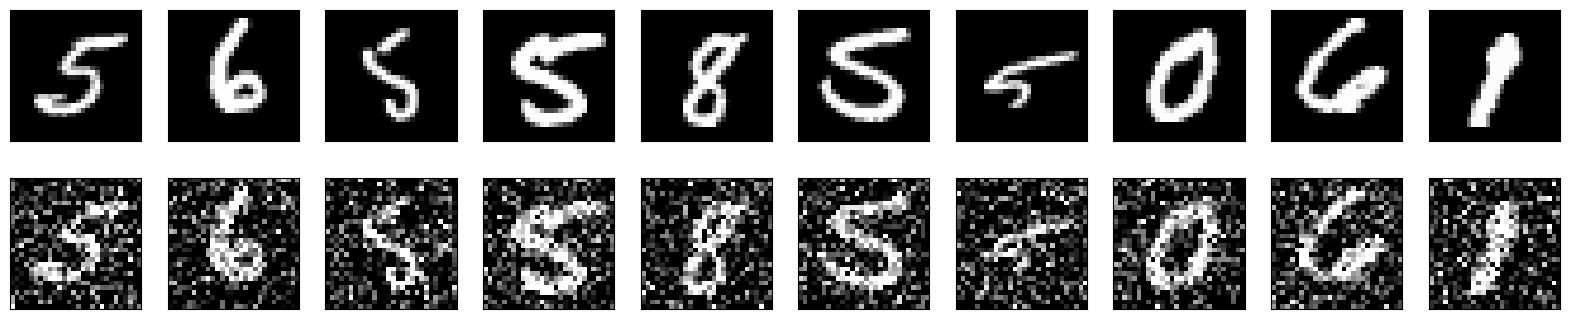

In [26]:
# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [27]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 14, 14, 32)       9248

In [28]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=5,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/5
469/469 [==============================] - 27s 56ms/step - loss: 0.1309 - val_loss: 0.0727
Epoch 2/5
469/469 [==============================] - 37s 79ms/step - loss: 0.0714 - val_loss: 0.0694
Epoch 3/5
469/469 [==============================] - 26s 55ms/step - loss: 0.0692 - val_loss: 0.0679
Epoch 4/5
469/469 [==============================] - 24s 50ms/step - loss: 0.0679 - val_loss: 0.0672
Epoch 5/5
469/469 [==============================] - 33s 70ms/step - loss: 0.0671 - val_loss: 0.0663


313/313 [==============================] - 2s 5ms/step


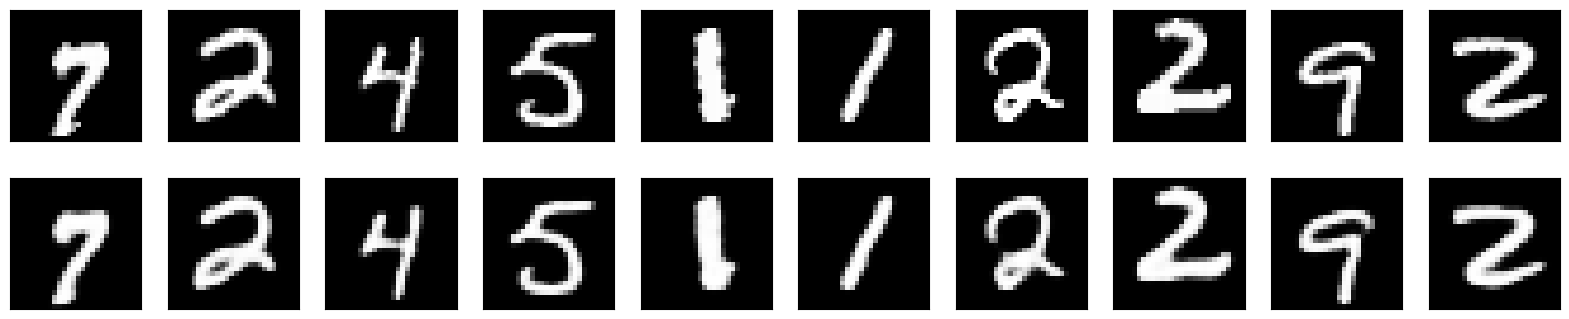

In [29]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [30]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=5,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/5
469/469 [==============================] - 33s 71ms/step - loss: 0.1002 - val_loss: 0.0936
Epoch 2/5
469/469 [==============================] - 27s 57ms/step - loss: 0.0932 - val_loss: 0.0916
Epoch 3/5
469/469 [==============================] - 23s 48ms/step - loss: 0.0916 - val_loss: 0.0903
Epoch 4/5
469/469 [==============================] - 25s 53ms/step - loss: 0.0904 - val_loss: 0.0894
Epoch 5/5
469/469 [==============================] - 26s 54ms/step - loss: 0.0896 - val_loss: 0.0887


313/313 [==============================] - 1s 4ms/step


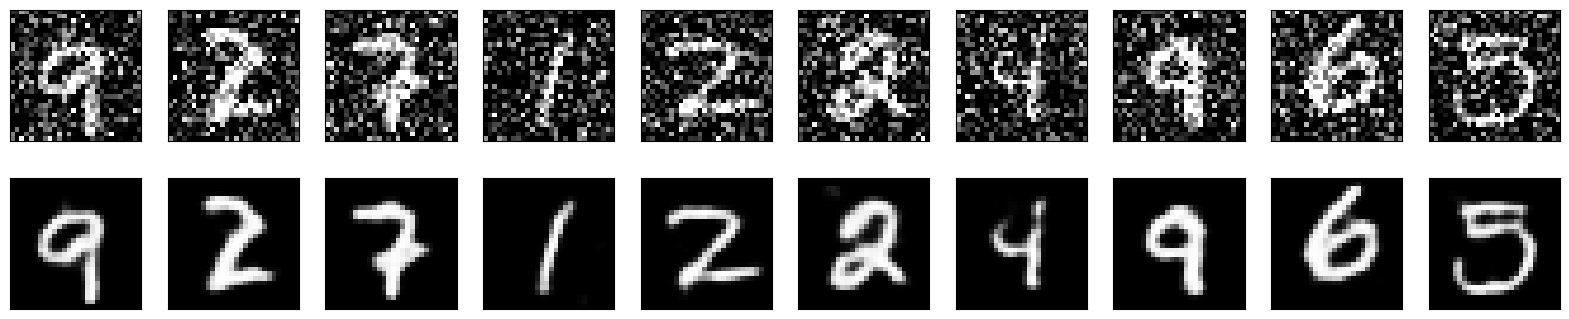

In [33]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)